# 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from subprocess import check_call
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data_feature = pd.read_csv('./temp_data/save_data_feature.csv',encoding='utf-8').rename(columns = {'Unnamed: 0': 'index'}).set_index('index',drop=True)
data_label = pd.read_csv('./temp_data/save_data_label.csv',encoding='utf-8').rename(columns = {'Unnamed: 0': 'index'}).set_index('index',drop=True)
x_test = pd.read_csv('./temp_data/save_x_test.csv',encoding='utf-8').rename(columns = {'Unnamed: 0': 'index'}).set_index('index',drop=True)
y_test = pd.read_csv('./temp_data/save_y_test.csv',encoding='utf-8').rename(columns = {'Unnamed: 0': 'index'}).set_index('index',drop=True)

In [3]:
x_test_copy = x_test.copy()
y_test_copy = y_test.copy()

x_test_copy = x_test_copy[data_feature.columns]

y_test_copy = y_test_copy.replace('Y',1)
y_test_copy = y_test_copy.replace('N',0)

### SMOTE 적용
 - SMOTE, Boarderline-SMOTE, ADASYN 중 가장 높은 재현율을 보여주는 ADASYN를 사용

In [4]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# x_train_over,y_train_over = smote.fit_resample(data_feature,data_label)

# print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', data_feature.shape, data_label.shape)
# print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_over.shape, y_train_over.shape)
# print('SMOTE 적용 후 레이블 값 분포: \n', y_train_over.value_counts())

In [5]:
# from imblearn.over_sampling import BorderlineSMOTE

# bsmote = BorderlineSMOTE(random_state=42)
# x_train_over,y_train_over = bsmote.fit_resample(cluster_x_train,cluster_y_train)

# print('BorderlineSMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', cluster_x_train.shape, cluster_y_train.shape)
# print('BorderlineSMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_over.shape, y_train_over.shape)
# print('BorderlineSMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

In [6]:
from imblearn.over_sampling import ADASYN

ads = ADASYN(random_state=42)
x_train_over,y_train_over = ads.fit_resample(data_feature,data_label)

print('ADASYN 적용 전 학습용 피처/레이블 데이터 세트: ', data_feature.shape, data_label.shape)
print('ADASYN 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_over.shape, y_train_over.shape)
print('ADASYN 적용 후 레이블 값 분포: \n', y_train_over.value_counts())

ADASYN 적용 전 학습용 피처/레이블 데이터 세트:  (8053, 31) (8053, 1)
ADASYN 적용 후 학습용 피처/레이블 데이터 세트:  (14737, 31) (14737, 1)
ADASYN 적용 후 레이블 값 분포: 
 SIU_CUST_YN
0              7406
1              7331
dtype: int64


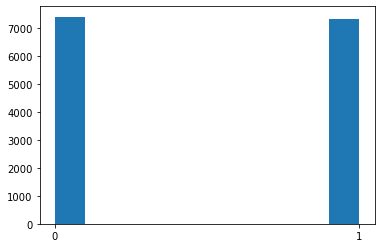

SIU_CUST_YN
0              7406
1              7331
dtype: int64
0.5010290294627383


In [7]:
plt.hist(y_train_over)
plt.xticks([0,1])
plt.show()

print(y_train_over.value_counts())
print(9251/(9213+9251))

### 모델 생성 및 평가
 - RandomForest로 모델 생성 후 DecisionTree로 모델의 의사결정을 간접적으로 확인함

## SMOTE 적용
##### SMOTE, Boarderline-SMOTE, ADASYN 중 가장 높은 재현율을 보여주는 ADASYN를 사용

In [8]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# x_train_over,y_train_over = smote.fit_resample(cluster_x_train,cluster_y_train)

# print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', cluster_x_train.shape, cluster_y_train.shape)
# print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_over.shape, y_train_over.shape)
# print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

In [9]:
# from imblearn.over_sampling import BorderlineSMOTE

# bsmote = BorderlineSMOTE(random_state=42)
# x_train_over,y_train_over = bsmote.fit_resample(cluster_x_train,cluster_y_train)

# print('BorderlineSMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', cluster_x_train.shape, cluster_y_train.shape)
# print('BorderlineSMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_over.shape, y_train_over.shape)
# print('BorderlineSMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

In [10]:
from imblearn.over_sampling import ADASYN

ads = ADASYN(random_state=42)
x_train_over,y_train_over = ads.fit_resample(data_feature,data_label)

print('ADASYN 적용 전 학습용 피처/레이블 데이터 세트: ', data_feature.shape, data_label.shape)
print('ADASYN 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_over.shape, y_train_over.shape)
print('ADASYN 적용 후 레이블 값 분포: \n', y_train_over.value_counts())

ADASYN 적용 전 학습용 피처/레이블 데이터 세트:  (8053, 31) (8053, 1)
ADASYN 적용 후 학습용 피처/레이블 데이터 세트:  (14737, 31) (14737, 1)
ADASYN 적용 후 레이블 값 분포: 
 SIU_CUST_YN
0              7406
1              7331
dtype: int64


In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

##### 튜닝 전

In [12]:
# DecisionTree Classifier 생성
rf_clf = RandomForestClassifier(random_state=42)

# DecisionTreeClassifer 학습.


rf_clf.fit(x_train_over, y_train_over)# train데이터 fit 

pred = rf_clf.predict(x_test_copy)

In [13]:
cf = confusion_matrix(y_test_copy, pred, labels=[1, 0])
print("confusion_matrix : ")
print(cf)
print()
r = recall_score(y_test_copy, pred, labels=[1, 0])
print("recall_score : " ,r)

confusion_matrix : 
[[ 180  186]
 [ 220 3531]]

recall_score :  0.4918032786885246


##### 튜닝 후

In [14]:
rf_clf = RandomForestClassifier(random_state=42)

params = {
    'n_estimators' : [10,40,70],
    'max_depth' : [3, 6, 9, 12, 15 ,18, 21, 24, 27], 
    'min_samples_split' : [2, 4, 6]
}

grid_cv = GridSearchCV(rf_clf, param_grid=params, scoring='recall', cv=5, verbose=1 )
grid_cv.fit(x_train_over , y_train_over)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_)) 
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
GridSearchCV 최고 평균 정확도 수치: 0.7857
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 10}


##### 모델 평가

In [15]:
best_rf_clf = grid_cv# GrideSearch 최적의 파라미터 
pred1 = best_rf_clf.predict(x_test_copy)

cf = confusion_matrix(y_test_copy, pred1, labels=[1, 0])
print("confusion_matrix : ")
print(cf)
print()

recall = recall_score(y_test_copy , pred1, labels=[1, 0])
print('결정 트리 예측 재현율:{0:.4f}'.format(recall))

precision = precision_score(y_test_copy , pred1, labels=[1, 0])
print('결정 트리 예측 정밀도:{0:.4f}'.format(precision))

f1 = f1_score(y_test_copy , pred1, labels=[1, 0])
print('결정 트리 예측 f1:{0:.4f}'.format(f1))

confusion_matrix : 
[[ 273   93]
 [ 891 2860]]

결정 트리 예측 재현율:0.7459
결정 트리 예측 정밀도:0.2345
결정 트리 예측 f1:0.3569


### 모델의 의사결정을 간접적으로 확인하기 위한 의사결정나무 모델링

In [16]:
# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=42)

# DecisionTreeClassifer 학습.

dt_clf.fit(x_train_over, y_train_over)# train데이터 fit 

pred = dt_clf.predict(x_test_copy)

cf = confusion_matrix(y_test_copy, pred, labels=[1, 0])
print("confusion_matrix : ")
print(cf)
print()
r = recall_score(y_test_copy, pred, labels=[1, 0])
print("recall_score : " ,r)

confusion_matrix : 
[[ 154  212]
 [ 378 3373]]

recall_score :  0.4207650273224044


##### 하이퍼 파라미터 확인

In [17]:
# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


##### GridSearchCV를 이용하여 최적의 depth를 찾음
##### max_depth와 min_samples_split를 이용하여 튜닝

In [18]:
dt_clf = DecisionTreeClassifier(random_state=42)

params = {
    'max_depth' : [3, 6, 9, 12, 15 ,18, 21, 24, 27, 30 ], 
    'min_samples_split' : [2, 4, 6, 8, 10],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='recall', cv=5, verbose=1 )
grid_cv.fit(x_train_over , y_train_over)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_)) 
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
GridSearchCV 최고 평균 정확도 수치: 0.7935
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_split': 2}


##### depth별 정확도 확인

In [19]:
# # GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
# cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# # max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
# cv_results_df[['param_max_depth', 'mean_test_score']] 

# max_depths = [3, 6, 9, 12, 15 ,18, 21, 24 ,27,30]
# # max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
# for depth in max_depths:
#     dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
#     dt_clf.fit(x_train_over,y_train_over) # train 데이터 fit
#     pred = dt_clf.predict(real_x_test) # test 데이터 predict 하기
#     recall = recall_score(y_test , pred, labels=[1, 0])
#     print('max_depth = {0} 재현율: {1:.4f}'.format(depth , recall))

##### 모델 평가

In [20]:
best_df_clf = grid_cv# GrideSearch 최적의 파라미터 
pred1 = best_df_clf.predict(x_test_copy)

cf = confusion_matrix(y_test_copy, pred1, labels=[1, 0])
print("confusion_matrix : ")
print(cf)
print()

recall = recall_score(y_test_copy , pred1, labels=[1, 0])
print('결정 트리 예측 재현율:{0:.4f}'.format(recall))

precision = precision_score(y_test_copy , pred1, labels=[1, 0])
print('결정 트리 예측 정밀도:{0:.4f}'.format(precision))

f1 = f1_score(y_test_copy , pred1, labels=[1, 0])
print('결정 트리 예측 f1:{0:.4f}'.format(f1))

confusion_matrix : 
[[ 266  100]
 [ 817 2934]]

결정 트리 예측 재현율:0.7268
결정 트리 예측 정밀도:0.2456
결정 트리 예측 f1:0.3671


##### graphviz로 모델 시각화

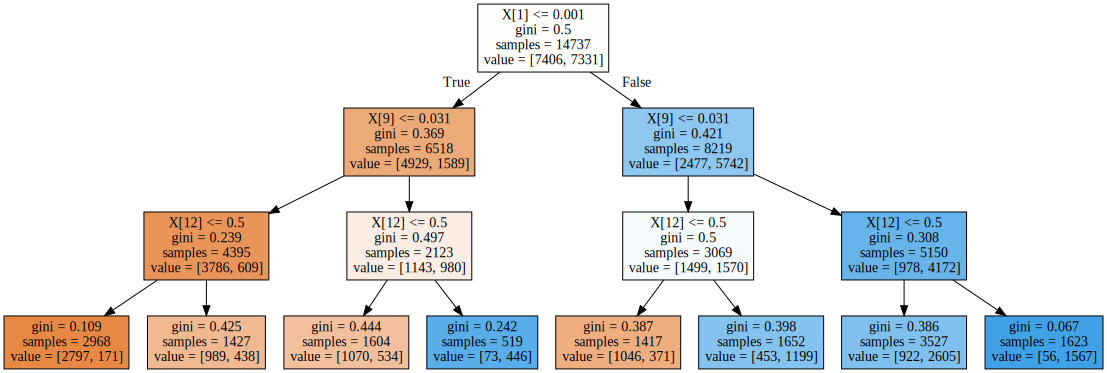

In [22]:
# # DecicionTreeClassifier 생성 (max_depth = 3 으로 제한)
dt_clf = DecisionTreeClassifier(max_depth=3, min_samples_split=2, random_state=42)
dt_clf.fit(x_train_over, y_train_over)

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, max_depth=3, out_file="tree.dot", impurity=True, filled=True)

import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)